# 선형회귀

50m, 1.5kg의 농어 데이터 사용하기

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                         21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                         23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                         27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                         39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                         44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                         115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                         218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                         556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                         850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                         1000.0])

In [6]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [7]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [8]:
print(knr.predict([[50]]))

[1033.33333333]


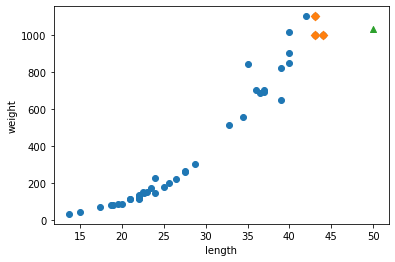

산점도를 보면 길이가 커질수록 무게가 증가하는 경향이 있지만, 50cm의 농어는 다른 결과가 나타났다.
그 이유는 모델 k-neighbors에 있다.
k-neighborsregression은 주변 k의 평균으로 결과를 구하기때문에
길이 50cm 이상의 데이터가 없기때문에 50cm 이하의 데이터로만 예측했다.


In [9]:
import matplotlib.pyplot as plt

# 50cm의 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 선점도 그리기
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm농어 데이터 추가
plt.scatter([50], knr.predict([[50]]), marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print('산점도를 보면 길이가 커질수록 무게가 증가하는 경향이 있지만, 50cm의 농어는 다른 결과가 나타났다.')
print('그 이유는 모델 k-neighbors에 있다.')
print('k-neighborsregression은 주변 k의 평균으로 결과를 구하기때문에')
print('길이 50cm 이상의 데이터가 없기때문에 50cm 이하의 데이터로만 예측했다.')

In [10]:
# 검증
print('k-neighborsRegression이 평균을 사용하지는 확인해보자')
print('평균: ', np.mean(train_target[indexes]),'\n') # train_target[indexes].mean()
print('50cm 농어의 무게로 예측한 값이 평균과 같다는걸 증명했다.')

k-neighborsRegression이 평균을 사용하지는 확인해보자
평균:  1033.3333333333333 

50cm 농어의 무게로 예측한 값이 평균과 같다는걸 증명했다.


In [11]:
# 검증2
print('k-neighborsRegression이 평균을 사용하는걸 알았고,')
print('평균을 쓰기 때문에 생기는 문제점 증명')
print('길이 10000cm의 농어 무게 예측:', knr.predict([[10000]]))

k-neighborsRegression이 평균을 사용하는걸 알았고,
평균을 쓰기 때문에 생기는 문제점 증명
길이 10000cm의 농어 무게 예측: [1033.33333333]


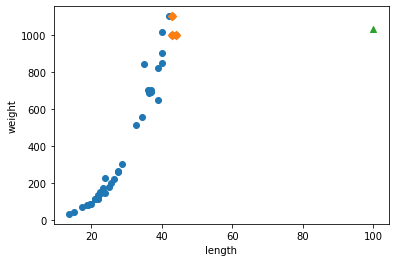

농어의 길이와 관계없이 무게가 일정수치 이상 증가하지 않는다


In [12]:
# 10000cm의 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 선점도 그리기
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm농어 데이터 추가
plt.scatter([100], knr.predict([[100]]), marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print('농어의 길이와 관계없이 무게가 일정수치 이상 증가하지 않는다')

# Linear Regression(선형회귀)

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [14]:
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [15]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


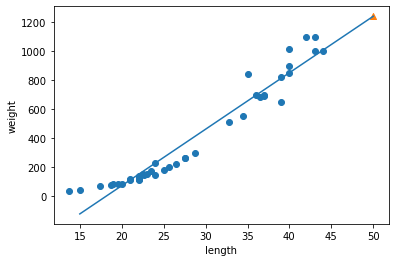

In [16]:
# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프 그리기
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm의 농어 데이터
plt.scatter(50, lr.predict([[50]]), marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [17]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


# 다항 회귀

In [18]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [19]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [20]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


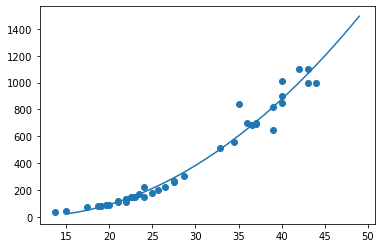

In [29]:
point = np.arange(15, 50)

# train set 산점도
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)